# Tutorial for vaex as a library
## Introduction
This tutorial shortly introduces how to use vaex from IPython notebook. This tutorial assumes you have vaex installed as a library, you can run `python -c 'import vaex'` to check this.
This document although not a IPython notebook, is generated from a notebook, and you should be able to reproduce all examples.

## Run IPython notebook
From the <a href='http://ipython.org/notebook.html'>IPython notebook website:</a>
> The IPython Notebook is an interactive computational environment, in which you can combine code execution, rich text, mathematics, plots and rich media

To start it, run `$ ipython notebook` in your shell, and it should automatically open the main webpage. Start a new notebook by clicking `new`.

## Starting
Start you notebook by importing the relevant packages, for this tutorial, we will be using vaex itself, <a href="www.nupmy.org">numpy</a> and <a href="matplotlib.org">matplotlib</a> for plotting. We also configure matplotib to show the plots in the notebook itself

In [1]:
import vaex as vx
import numpy as np
import pylab # simpler interface for matplotlib
# next line configures matplotlib to show the plots in the notebook, other option is qt to open a dialog
%matplotlib inline

/Users/maartenbreddels/.local/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


## Open a dataset
To open a dataset, we can call vx.open to open local files. See the documentation of <a href=''>vaex.open</a> for the arguments, or run `vx.open?` in the notebook for direct help. For this tutorial we use `vx.example()` which opens a dataset provided with vaex.

In [3]:
dataset = vx.example()
# dataset = vx.open('yourfile.hdf5') # in case you want to load a different dataset

You can get information about the dataset, such as the columns by simply typing `dataset` as the last command in a cell.

In [4]:
dataset

To get a list with all column names, use Dataset's get_column_names method. Note that tab completion should work, typing `dataset.get_c` and then pressing type should help.


In [5]:
dataset.get_column_names()

['x', 'y', 'z', 'vx', 'vy', 'vz', u'E', u'FeH', u'L', u'Lz', u'random_index']

## Using subspaces
Since we often work with a few columns, for instance 2 when we want to do plot, we create a `vaex.dataset.Subspace` from the dataset. 

In [6]:
subspace_xy = dataset("x", "y")

Subspace contain methods to compute statistics, n dimensional histograms, and convenient plotting routines.

In [7]:
print "means", subspace_xy.mean()
print "variance", subspace_xy.var()
xlimits, ylimits = subspace_xy.minmax()
print "(xmin, xmax) =", xlimits
print "(ymin, ymax) =", ylimits

means [-0.06713149 -0.05358987]
variance [ 53.54972406  60.62545068]
(xmin, xmax) = [-128.293991  271.365997]
(ymin, ymax) = [ -71.5523682  146.465836 ]


In [8]:
limits = subspace_xy.limits_sigma(square=True) # create boundaries around the mean with +/-3 sigma
# square=True forces the boundaries to be square by taking for sigma the mean sigma
grid = subspace_xy.histogram(limits)

Grid in this case is a two dimensional numpy array, which we will use for plotting. In this case it is 256x256, but you can pass an integer as argument to histogram to change the size (e.g. `subspace_xy.histogram(limits, size=128)`.

In [9]:
print "grid shape", grid.shape
print grid.sum(), "of a total of ", len(dataset), "objects are visible"

grid shape (256, 256)
321201.0 of a total of  330000 objects are visible


## Plotting
Now that we have 2d histogram, we can plot this using matplotlib, by using `pylab.imshow` (hint: use `pylab.imshow?` for help).

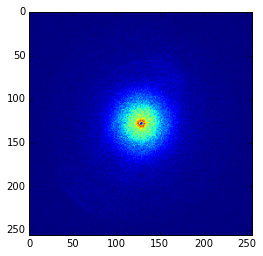

In [10]:
pylab.imshow(grid)

Matplotlib by default will show the image 'upside down', and it does not have information about the axis.

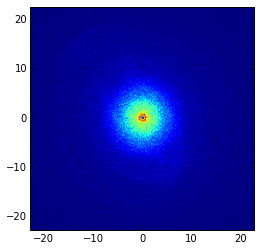

In [11]:
pylab.imshow(grid, extent=limits.flatten(), origin='lower')

You can also use subspace_xy.plot(grid, limits) 

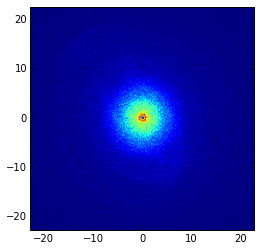

In [12]:
subspace_xy.plot(grid, limits)

In [13]:
vx.open('../data/Aq-A-2-999-shuffled-10percent.hdf5')